In [3]:
%config IPCompiler.greedy=True #TAB代码自动提示
import tensorflow as tf
from tensorflow import keras

### 卷积神经网络
**几个概念**
- 卷积 Convolution
- Max Pooling 增强特性，减少数据

In [15]:
fashion_mmist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mmist.load_data()

model = keras.Sequential()
model.add(keras.layers.Conv2D(64, (3, 3), activation="relu", input_shape=(28, 28, 1)))
model.add(keras.layers.MaxPooling2D(2, 2))

model.add(keras.layers.Conv2D(64, (3, 3), activation="relu"))
model.add(keras.layers.MaxPooling2D(2, 2))

model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(128, activation=tf.nn.relu))
model.add(keras.layers.Dense(10, activation=tf.nn.softmax))

model.compile(optimizer=tf.optimizers.Adam(), 
              loss=tf.losses.sparse_categorical_crossentropy,
               metrics=["accuracy"]
             )

train_images_scaled = train_images / 255
model.fit(train_images_scaled.reshape(-1, 28, 28, 1), train_labels, epochs=5)


Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 22s 371us/sample - loss: 0.4475 - accuracy: 0.8366
Epoch 2/5
60000/60000 [==============================] - 23s 385us/sample - loss: 0.2925 - accuracy: 0.8922
Epoch 3/5
60000/60000 [==============================] - 24s 395us/sample - loss: 0.2485 - accuracy: 0.9083
Epoch 4/5
60000/60000 [==============================] - 24s 394us/sample - loss: 0.2184 - accuracy: 0.9182
Epoch 5/5
60000/60000 [==============================] - 24s 399us/sample - loss: 0.1918 - accuracy: 0.9284


In [16]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 26, 26, 64)        640       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 11, 11, 64)        36928     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 1600)              0         
_________________________________________________________________
dense_8 (Dense)              (None, 128)               204928    
_________________________________________________________________
dense_9 (Dense)              (None, 10)               

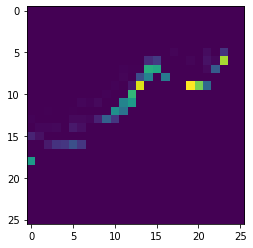

In [25]:
import matplotlib.pyplot as plt
layer_outputs = [layer.output for layer in model.layers]
activation_mode = tf.keras.models.Model(inputs = model.input, outputs = layer_outputs)
pred = activation_mode.predict(test_images[0].reshape(-1, 28, 28, 1))

plt.imshow(pred[0][0, :, :, 0])